In [1]:
#for pandas
import pandas as pd

In [2]:
#for numpy
import numpy as np

In [3]:
#for loading data thru .mat extension files
import scipy.io as sci

In [4]:
#for plotiing puropse
import matplotlib.pyplot as plt

In [5]:
#i dont know but when i plot many lines(or graphs) on a single subplot using plt.hold() python displays it but shows warning
#so to ignore warnings this library was added
import warnings
warnings.filterwarnings("ignore")


In [6]:
#this function assigns nearest cluster centroid to each point
def findclosestcent(x,curcentloc):
    [m,n]=x.shape
    [cenm,cenn]=curcentloc.shape
    idx=np.zeros(m)
    for i in range(0,m):
      hey=[]
      for spy in range(0,cenm):
        error=np.sum((x[i,:]-curcentloc[spy,:])**2)
        hey.append(error)
      hey=np.array(hey)
      idx[i]=np.argmin(hey)+1
    return idx

In [7]:
#after assigning each point with a nearest cluster centroid the new positions of cluster centroids are calculated
def computecentroids(x,idx,k):
    [m,n]=x.shape
    centloc=np.zeros((k,n))
    for i in range(0,k):
        count=0
        for spydy in range(0,m):
          if idx[spydy]==i+1:
            centloc[i,:]=centloc[i,:]+x[spydy,:]
            count+=1
        centloc[i,:]=(1/count)*centloc[i,:]
    return centloc

In [8]:
#this run k means algorithm for specified number of times(called iterations) and 
#plots all points(input training with assignment of nearest cluster centroids, centroid) 
def runkmeans(x,ini_centroids,max_iterations,k,wanttoplot):
    centloc=ini_centroids
    plt.figure(figsize=(20,20))
    for ite in range(0,max_iterations):
        idx=findclosestcent(x,centloc)
        centloc=computecentroids(x,idx,k)
        if wanttoplot==True:
          plotrunkmeansstep(x,idx,centloc,ite+1)
    plt.tight_layout()
    return centloc,idx

In [9]:
#this is the subplotting function
def plotrunkmeansstep(x,idx,centloc,itenum):
    red=(idx==1).ravel()
    green=(idx==2).ravel()
    blue=(idx==3).ravel()
    ax=plt.subplot(5,2,itenum)
    #ax.set_xlim([0,10])
    #ax.set_ylim([0,10])
    plt.scatter(x[red,0],x[red,1],marker='o',c='r')
    plt.hold(1)
    plt.scatter(x[green,0],x[green,1],marker='o',c='green')
    plt.hold(1)
    plt.scatter(x[blue,0],x[blue,1],marker='o',c='blue')
    plt.hold(1)
    plt.legend(["cluster 1","cluster 2","cluster 2"],loc="bottom right")
    plt.scatter(centloc[0,0],centloc[0,1],marker='^',c='r',s=500)
    plt.annotate("Centroid_1",xy=(centloc[0,0],centloc[0,1]),xytext=(centloc[0,0]+0.5,centloc[0,1]+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    plt.hold(1)
    plt.scatter(centloc[1,0],centloc[1,1],marker='^',c='green',s=500)
    plt.annotate("Centroid_2",xy=(centloc[1,0],centloc[1,1]),xytext=(centloc[1,0]+0.5,centloc[1,1]+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    plt.hold(1)
    plt.scatter(centloc[2,0],centloc[2,1],marker='^',c='blue',s=500)
    plt.annotate("Centroid_3",xy=(centloc[2,0],centloc[2,1]),xytext=(centloc[2,0]+0.5,centloc[2,1]+0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    plt.hold(1)
    plt.title("Results after iteration : %d"%(itenum))
    

In [10]:
#this initializes random points(from set of x) to cluster centroids
def geninicent(x,k):
    [m,n]=x.shape
    ran=np.arange(0,m,1)
    np.random.shuffle(ran)
    ran=ran[0:k]
    cent=x[ran,:]
    return cent

In [11]:
#location of file ex7data2.mat
datafileloc2="C:/Users/RitKat/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 8/machine-learning-ex7/ex7/ex7data2.mat"

In [12]:
#loading ex7data2.mat file
data2=sci.loadmat(datafileloc2)

In [13]:
print(type(data2))

<class 'dict'>


In [14]:
#finding keys present in data2
for i in data2:
    print(i)

__header__
__version__
__globals__
X


In [15]:
#extracting training examples
x=np.array(data2["X"])

In [16]:
[mtrain,ntrain]=x.shape
print([mtrain,ntrain])

[300, 2]


In [17]:
#by problem statement i.e. number of clusters
K=3


In [18]:
#initializing cluster centroids
ini_centroids=np.array([[3,3],[6,2],[8,5]])

In [19]:
print(ini_centroids)

[[3 3]
 [6 2]
 [8 5]]


In [20]:
#location holder variable of centroids for each eaxmple[training or testing]
idx=findclosestcent(x,ini_centroids)
print(idx)

[1. 3. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2.
 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 1. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 1.]


In [21]:
#new cluster positions
centloc=computecentroids(x,idx,3)

In [22]:
print(centloc)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [23]:
#now running k means algorithm

In [24]:
#reinitializing cluster centroids and setting value for number of iterations and clusters to form
max_iterations=10
ini_centroids=np.array([[3,3],[6,2],[8,5]])
K=3

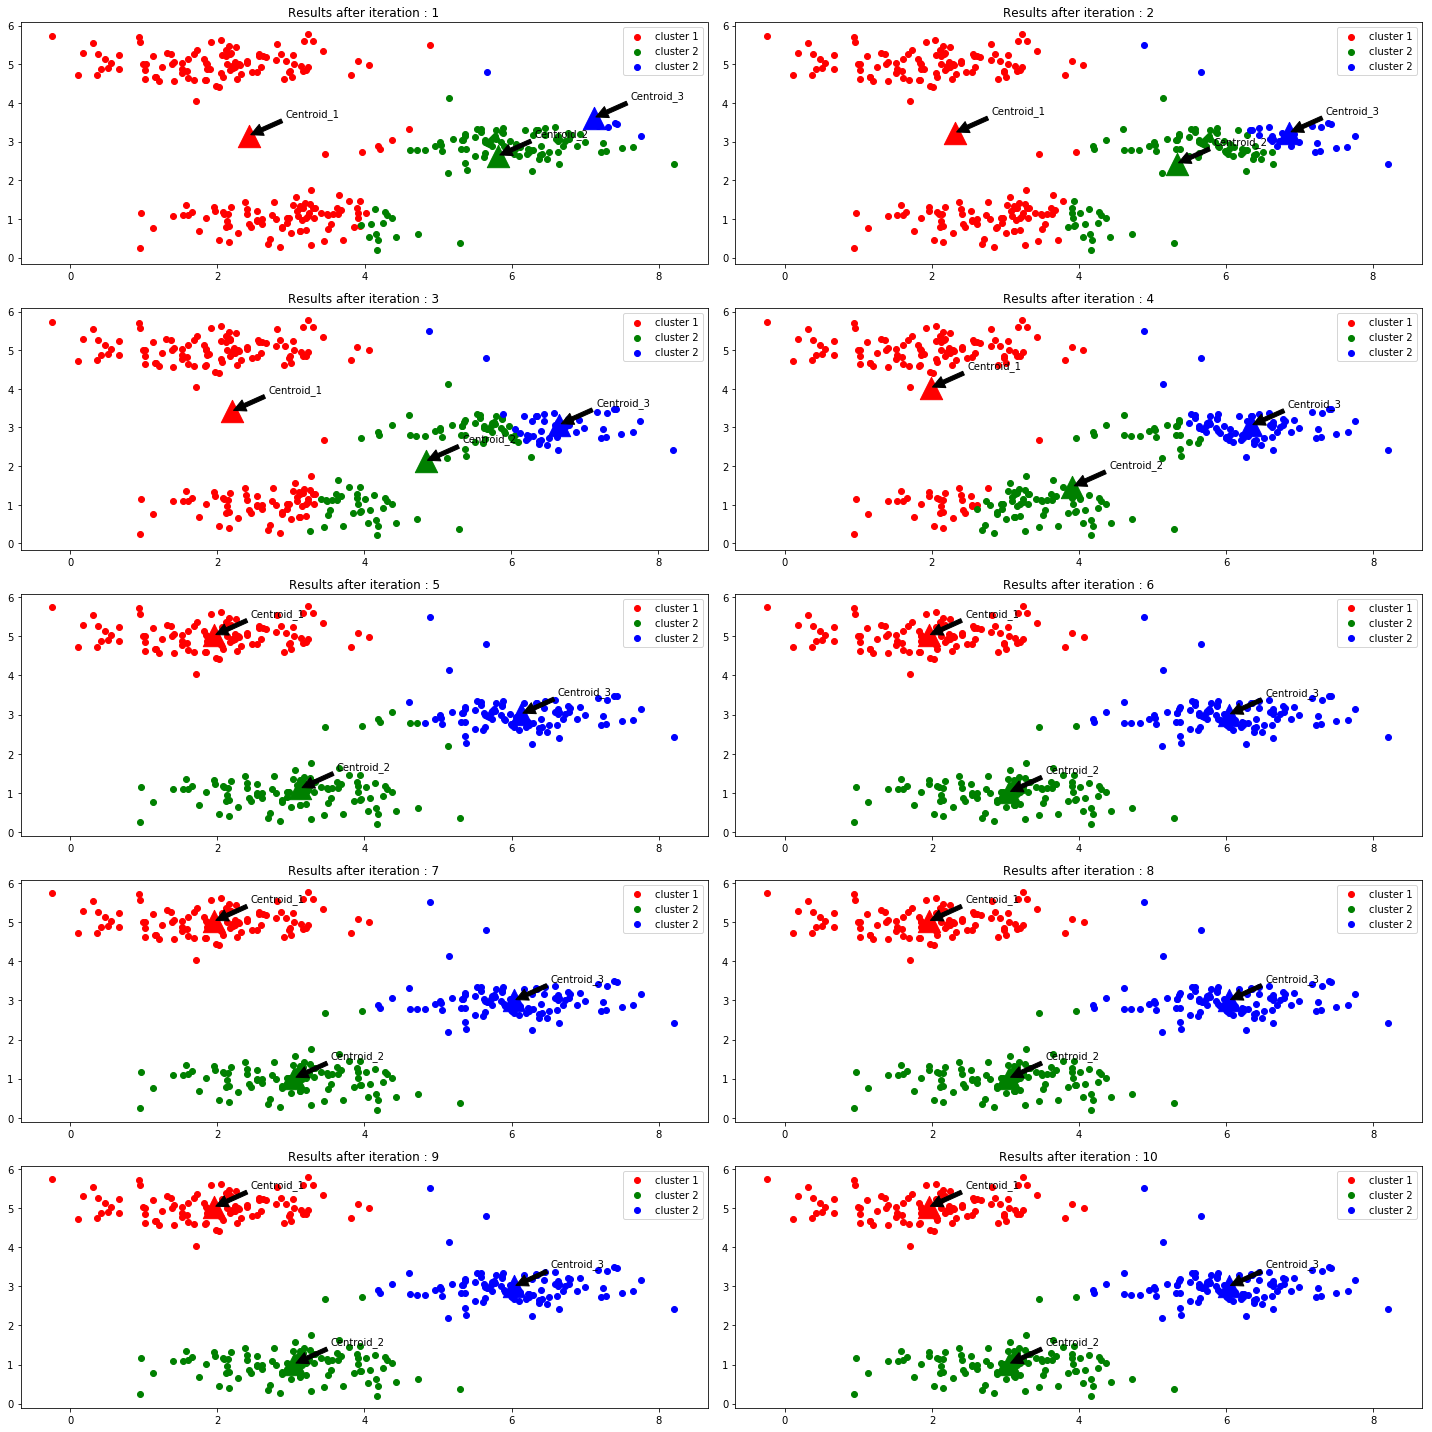

In [25]:
#running k means for above mentioned parameters
centloc,idx=runkmeans(x,ini_centroids,max_iterations,3,True)

In [26]:
#now starting exercise 1.4 onwards


In [27]:
#bird_small.mat file location
birdloc="C:/Users/RitKat/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 8/machine-learning-ex7/ex7/bird_small.mat"

# If we load image data from bird_small.mat file we will get the image colored a bit differently so end result will not look exactly the same as in problem statement


In [28]:
#loading data from bird_small.mat 
birddata=sci.loadmat(birdloc)

In [29]:
#identifying keys present in birddata
for i in birddata:
    print(i)

__header__
__version__
__globals__
A


In [30]:
#extracting
A=np.array(birddata["A"])

In [31]:
#dimensions of A
[mbird,nbird,zbird]=A.shape
print([mbird,nbird,zbird])

[128, 128, 3]


In [32]:
#dividing by 255 to get valoes b/w 0 and 1
A=A/255

In [33]:
#knowing about shape of A
print(A.shape)
print(A[0,0,:])

(128, 128, 3)
[0.85882353 0.70588235 0.40392157]


In [34]:
#reshaping array to xbird
xbird=np.zeros((mbird*nbird,3))
print(xbird.shape)

(16384, 3)


In [35]:
#converting 3d to 2d for processing
ini=0
for i in range(0,128):
    for j in range(0,128):
      xbird[ini]=A[i,j,:]
      ini+=1

In [36]:
#checking 1st row to check that it is same with original 3d matrix
print(xbird[0,:])

[0.85882353 0.70588235 0.40392157]


In [37]:
#parameters liek number of cluster, number of iterations and initialization of centroids
Kbird=16
max_iterationsbird=10
ini_centroidsbird=geninicent(xbird,Kbird)

In [38]:
#running k means on modified matrix(2d)
centlocbird,idxbird=runkmeans(xbird,ini_centroidsbird,max_iterationsbird,Kbird,False)

In [39]:
print(centlocbird.shape)

(16, 3)


In [40]:
#finally assigning clusters to modified matrix
idxbird=findclosestcent(xbird,centlocbird)

In [41]:
#assigning corresponding cluster centroids to points in modified matrix
xrecoverbird=xbird
for i in range(0,mbird*nbird):
    hehe=int(idxbird[i]-1)
    hey=centlocbird[hehe,:]
    xrecoverbird[i,:]=hey

In [42]:
#recovering 3d matrix from 2d matrix
xrecoverbird=xrecoverbird.reshape(mbird,nbird,3)

In [43]:
#checking dimensions whether it is in 3d or not
print(xrecoverbird.shape)

(128, 128, 3)


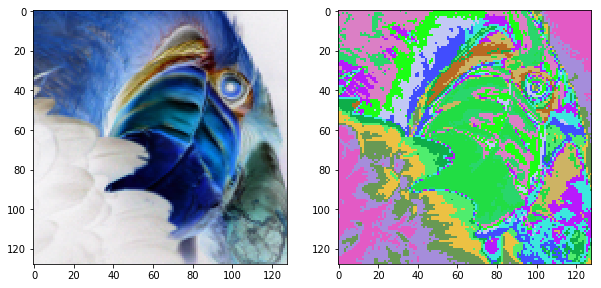

In [44]:
#plotting original and modified image side by side
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(A*255)
plt.subplot(1,2,2)
plt.imshow(xrecoverbird*255)

# If we load bird's image data using "plt.imread(bird_small.png)" we will get exact same result as mentioned in problem statement pdf




In [45]:
#extracting
A=plt.imread('bird_small.png')

In [46]:
#dimensions of A
[mbird,nbird,zbird]=A.shape
print([mbird,nbird,zbird])

[128, 128, 3]


In [47]:
#dividing by 255 to get valoes b/w 0 and 1
A=A/255

In [48]:
#knowing about shape of A
print(A.shape)
print(A[0,0,:])

(128, 128, 3)
[0.00336794 0.00276817 0.00158401]


In [49]:
#reshaping array to xbird
xbird=np.zeros((mbird*nbird,3))
print(xbird.shape)

(16384, 3)


In [50]:
#converting 3d to 2d for processing
ini=0
for i in range(0,128):
    for j in range(0,128):
      xbird[ini]=A[i,j,:]
      ini+=1

In [51]:
#checking 1st row to check that it is same with original 3d matrix
print(xbird[0,:])

[0.00336794 0.00276817 0.00158401]


In [52]:
#parameters liek number of cluster, number of iterations and initialization of centroids
Kbird=16
max_iterationsbird=10
ini_centroidsbird=geninicent(xbird,Kbird)

In [53]:
#running k means on modified matrix(2d)
centlocbird,idxbird=runkmeans(xbird,ini_centroidsbird,max_iterationsbird,Kbird,False)

In [54]:
print(centlocbird.shape)

(16, 3)


In [55]:
#finally assigning clusters to modified matrix
idxbird=findclosestcent(xbird,centlocbird)

In [56]:
#assigning corresponding cluster centroids to points in modified matrix
xrecoverbird=xbird
for i in range(0,mbird*nbird):
    hehe=int(idxbird[i]-1)
    hey=centlocbird[hehe,:]
    xrecoverbird[i,:]=hey

In [57]:
#recovering 3d matrix from 2d matrix
xrecoverbird=xrecoverbird.reshape(mbird,nbird,3)

In [58]:
#checking dimensions whether it is in 3d or not
print(xrecoverbird.shape)

(128, 128, 3)


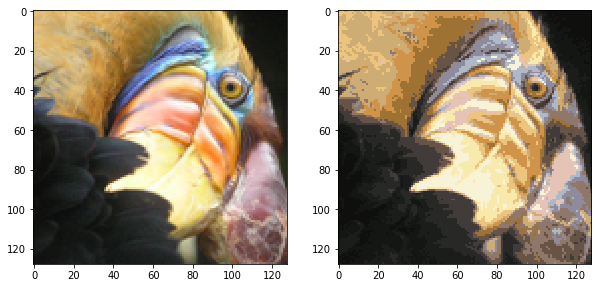

In [59]:
#plotting original and modified image side by side
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(A*255)
plt.subplot(1,2,2)
plt.imshow(xrecoverbird*255)